## 2021 Fall "EE488 : Quantum and Solid-State Physics for Semiconductor Devices"


## Tight binding model: Graphene

Writer: Ryong-Gyu, Lee (KAIST EE, Yong-Hoon Kim Group)  
2021.10.12 (revised)  

**References**:  
http://demonstrations.wolfram.com/GrapheneBrillouinZoneAndElectronicEnergyDispersion/


### Graphene Brillouin zone and electronic energy dispersion

Using the tight-binding model, we can get the electronic energy dispersion of graphene as below:

$$\begin{gather*}
E_{v,c}(k_x,k_y)=\frac{\epsilon_{2p} \pm t w(k_x,k_y)}{1 \pm s w(k_x,k_y)}\\
w(k_x,k_y)=\sqrt{1+4\cos(\frac{\sqrt{3}k_x a}{2})\cos(\frac{k_y a}{2})+4\cos^2(\frac{k_y a}{2})} \\
t = \langle \phi_{A}(r-R_A) | H | \phi_{B} (r-R_A-R_{1i})\rangle \quad (i=1,2,3)\\
s = \langle \phi_{A}(r-R_A) | \phi_{B} (r-R_A-R_{1i})\rangle \quad (i=1,2,3) \\
\\
\end{gather*}
$$

In [10]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

def TB_graphene(mode, e=0, s=0, t=-2):
    
    # Tight-binding model: E-K relation for Ev and Ec
    def _Ek(e, s, t, kx, ky):    
        f  = np.exp(1j*kx*acc) + 2 * np.exp(-1j*kx*acc/2) * np.cos(ky*a0/2)
        ff = np.exp(-1j*kx*acc) + 2 * np.exp(1j*kx*acc/2) * np.cos(ky*a0/2)
        w  = np.sqrt(f * ff)
        Ev = np.real((e+t*w) / (1+s*w))
        Ec = np.real((e-t*w) / (1-s*w))
        
        return Ev, Ec

    # plot 3d band structure
    def _plot3D():
    
        fig = plt.figure(figsize = (5,5))
        ax = fig.add_subplot(111, projection='3d')
        
        # Plot BZ boundary
        ax.plot(K12[:,0], K12[:,1], BZKz, 'r', linewidth = 1.5)
        ax.plot(K23[:,0], K23[:,1], BZKz, 'r', linewidth = 1.5)
        ax.plot(K34[:,0], K34[:,1], BZKz, 'r', linewidth = 1.5)
        ax.plot(K45[:,0], K45[:,1], BZKz, 'r', linewidth = 1.5)
        ax.plot(K56[:,0], K56[:,1], BZKz, 'r', linewidth = 1.5)
        ax.plot(K61[:,0], K61[:,1], BZKz, 'r', linewidth = 1.5)

        # Plot energy dispersion
        normalize = mpl.colors.Normalize(vmin=-6,vmax=6)
        Ev_surf = ax.plot_surface(Kx,Ky,Ev,cmap='coolwarm',norm=normalize,alpha=0.9)
        Ec_surf = ax.plot_surface(Kx,Ky,Ec,cmap='coolwarm',norm=normalize,alpha=0.9)

        ax.set_zlim(-15,15)
        ax.set_xlabel(r'$K_{x}$')
        ax.set_ylabel(r'$K_{y}$')
        ax.set_zlabel(r'$Energy [eV]$')
        fig.tight_layout()
        plt.show()

    # plot 2d band structure
    def _plot2D():

        fig = plt.figure(figsize = (8,4))
        ax1 = fig.add_subplot(121) # valence band
        ax2 = fig.add_subplot(122) # conduction band

        # Plot BZ boundary (valence)
        ax1.plot(K12[:,0], K12[:,1],'k', linewidth = 2)
        ax1.plot(K23[:,0], K23[:,1],'k', linewidth = 2)
        ax1.plot(K34[:,0], K34[:,1],'k', linewidth = 2)
        ax1.plot(K45[:,0], K45[:,1],'k', linewidth = 2)
        ax1.plot(K56[:,0], K56[:,1],'k', linewidth = 2)
        ax1.plot(K61[:,0], K61[:,1],'k', linewidth = 2)
        # Plot BZ boundary (conduction) 
        ax2.plot(K12[:,0], K12[:,1],'k', linewidth = 2)
        ax2.plot(K23[:,0], K23[:,1],'k', linewidth = 2)
        ax2.plot(K34[:,0], K34[:,1],'k', linewidth = 2)
        ax2.plot(K45[:,0], K45[:,1],'k', linewidth = 2)
        ax2.plot(K56[:,0], K56[:,1],'k', linewidth = 2)
        ax2.plot(K61[:,0], K61[:,1],'k', linewidth = 2)
 
        # set labels and titles
        ax1.title.set_text('Valence band')
        ax1.set_xlabel(r'$K_{x}$')
        ax1.set_ylabel(r'$K_{y}$')
        ax2.title.set_text('Conduction band')
        ax2.set_xlabel(r'$K_{x}$')
        ax2.set_ylabel(r'$K_{y}$') 

        # Energy contour plot
        normalize = mpl.colors.Normalize(vmin=-6,vmax=6)
        ax1.contourf(Kx, Ky, Ev, levels=12, norm=normalize, cmap="RdBu_r")
        ax2.contourf(Kx, Ky, Ec, levels=12, norm=normalize, cmap="RdBu_r")
        plt.tight_layout()
        plt.show()

    # plot 1d band structure
    def _plot1D():
        
        fig =plt.figure(figsize=(4.5,3))

        # Plot energy dispersion
        plt.plot(Ev)
        plt.plot(Ec)
        plt.xlim([0,len(Ev)-2])
        plt.ylim([-15,15])
        plt.xticks([0,29, 59,89],[r'$\Gamma$',r'$K$',r'$M$',r'$\Gamma$'])
        plt.ylabel(r'$Energy [eV]$')
        fig.tight_layout()
        plt.show()

                
    # Parameters
    acc = 1.42             # Carbon-Carbon bond length
    a0  = np.sqrt(3) * acc # graphene lattice parameter
    a1  = a0 * np.array([np.sqrt(3)/2, 1/2])    # real unit vectors of graphene lattice 
    a2  = a0 * np.array([1/np.sqrt(3), -1/2])
    b1  = (2*np.pi/a0) * np.array([1/np.sqrt(3),1])  # reciprocal unit vectors of graphene
    b2  = (2*np.pi/a0) * np.array([1/np.sqrt(3),-1])

    # Nanotube Brillouin zone
    BZKx = 2*np.pi / (np.sqrt(3)*a0)
    BZKy = 2*np.pi / (3*a0)
    Gamma = np.array([0,0])
    M1    = np.array([BZKx,0])
    K1    = np.array([BZKx,-BZKy])
    K2    = np.array([BZKx,BZKy])
    K3    = np.array([0,2*BZKy])
    K4    = np.array([-BZKx,BZKy])
    K5    = np.array([-BZKx,-BZKy])
    K6    = np.array([0,-2*BZKy])

    # Hexagonal BZ
    K12 = np.linspace(K1,K2,30)
    K23 = np.linspace(K2,K3,30)
    K34 = np.linspace(K3,K4,30)
    K45 = np.linspace(K4,K5,30)
    K56 = np.linspace(K5,K6,30)
    K61 = np.linspace(K6,K1,30)
    BZKz = np.zeros(30)
    
    
    # Grid space
    X = np.linspace(-BZKx, BZKx, 61)
    Y = np.linspace(-2*BZKy, 2*BZKy, 61)
    Kx, Ky = np.meshgrid(X, Y) 


    # Calculate 3d energy dispersion
    if mode=='3D':
        Ev, Ec = _Ek(e, s, t, Kx, Ky)       
        _plot3D()
    # Calculate 1d energy dispersion
    elif mode=='2D':
        Ev, Ec = _Ek(e, s, t, Kx, Ky)   
        _plot2D()        
    # Calculate 1d energy dispersion
    elif mode=='1D':
        # K path
        K_GK = np.linspace(Gamma, K1, 31)
        K_KM = np.linspace(K1, M1, 31)
        K_MG = np.linspace(M1, Gamma, 31)
        Kline = np.append(K_GK[:-1], K_KM[:-1], axis = 0)
        Kline = np.append(Kline, K_MG, axis = 0)
        Ev, Ec = _Ek(e, s, t, Kline[:,0], Kline[:,1])
        _plot1D()


if __name__=="__main__":
    
    import ipywidgets as widgets
    widgets.interact(TB_graphene,
                     mode = ['1D','2D','3D'],
                     e=(-1,1,0.1),
                     s=(-0.2,0.2,0.01),
                     t=(-5,5,0.1)
                    )
    
        

interactive(children=(Dropdown(description='mode', options=('1D', '2D', '3D'), value='1D'), FloatSlider(value=…

### Discussion

- Check the effect of parameters $\epsilon_{2p}$, $t$ and $s$ on the energy dispersion
- For $s=0$ case, find the band gap relations at $\Gamma$ and $M$ points  
**Hint:** you can also analytically derive the relation using the above tight-binding formula
- Find the approximate $t$ and $s$ parameters which can reproduce the ab-initio calculation result (solid line in below figure)

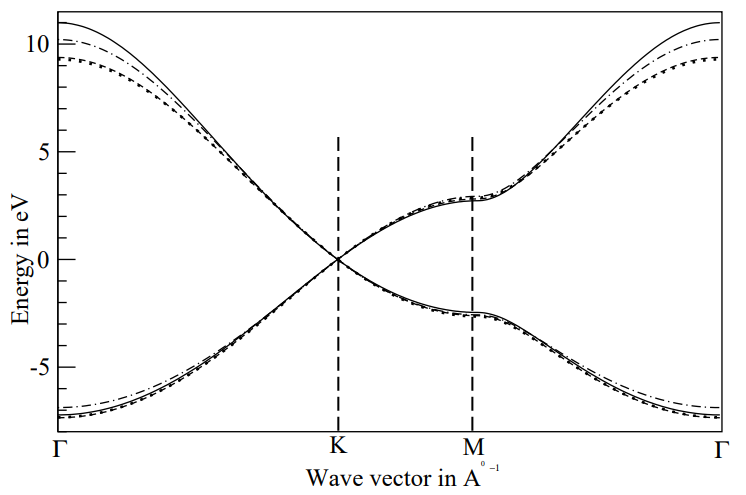

Check the reference: https://doi.org/10.1142/S0217984911025663